<a href="https://colab.research.google.com/github/knobs-dials/wetsuite-dev/blob/main/notebooks/intro/using_dataset_kamervragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (only) in colab, run this first to install wetsuite from (the most recent) source.   For your own setup, see wetsuite's install guidelines.
!pip3 install -U --no-cache-dir --quiet https://github.com/knobs-dials/wetsuite-dev/archive/refs/heads/main.zip

# Purpose of this notebook

Give a brief introduction to the contents of the structured `kamervragen` dataset.

In [1]:
import wetsuite.datasets

kamervragen = wetsuite.datasets.load('kamervragen-struc')

In [2]:
print(kamervragen.description)


    Questions from members of the parliament (at the moment only tweede kamer) to the government.

    Source: The KOOP SRU repositories,  specifically the ah-tk documents (aanhangsels, tweede kamer) within the officielepublicaties set.
    Restricted to documents that contain answers (ignoring documents that are only the questions, or only a note that they will be answered later)

    The structure of .data looks something like:
       {'ah-tk-20102011-2857': {
            'identifier': 'ah-tk-20102011-2857',
            'urls':   [ 'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/metadata/metadata.xml',
                        'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/xml/ah-tk-20102011-2857.xml',
                        ... 
                      ],
            'issued':       '2011-06-17',
            'available':    '2011-06-23',
            'vergaderjaar': '2010-2011',
            

# Extract some questions and answers

In [4]:
import textwrap, random

doc_id, details = random.choice( list(kamervragen.data.items()) )

print(f'==== {doc_id} ====')
for question_number, question_and_answer in details['vraagdata'].items():
    # note that these will be [plaintext, xmlfragment] # TODO improve this
    question = question_and_answer['vraag']
    answer   = question_and_answer['antwoord']

    if question and answer:
        # just print them in a somewhat nice-looking format:
        q_wrapped = '\n'.join(textwrap.wrap(question[0], subsequent_indent='        '))
        a_wrapped = '\n'.join(textwrap.wrap(answer[0], subsequent_indent='        '))
        print(f'Q{question_number: <5}  {q_wrapped}\nA{question_number: <5}  {a_wrapped}\n')


==== ah-tk-20122013-1615 ====
Q1      Kent u de berichten «Werkstraf in plaats van tien weken cel»,
        «Oudjaarstuig lacht om straf», en «Hufters overal
        buitensluiten»?
A1      Ja.

Q2 3    Hoe beoordeelt u het door u zo bejubelde (super)snelrecht nu de
        rechters veel lagere straffen opleggen dan door het Openbaar
        Ministerie worden geëist?  Deelt u de mening dat dit een
        schoffering is van de politieagenten die dit tuig arresteren?
        Zo nee, waarom niet?
A2 3    In de eerste week van januari 2013 hebben in totaal 16 verdachten zich
        voor de supersnelrechter moeten verantwoorden. Van deze 16
        zaken resulteerden 12 in een veroordeling en zijn 3 door de
        rechter aangehouden omdat er nog getuigen moesten worden
        gehoord. In één zaak werd de verdachte vrijgesproken. In 8 van
        de 12 zaken waarin de rechter tot een veroordeling kwam,
        betrof die veroordeling een (voorwaardelijke) gevangenisstraf,
        variër

# What does the metadata look like?

In [5]:
import pandas   # pandas is a nice way to inspect and alter tabular data
df = pandas.DataFrame.from_dict(kamervragen.data, orient='index')
df

,urls,indiener,ontvanger,vergaderjaar,available,issued,type,category,identifier,vraagdata
ah-tk-20152016-84,[https://repository.overheid.nl/frbr/officiele...,[T.E. Siderius],[S. Dekker],2015-2016,2015-09-22,2015-09-22,"[officiële publicatie, Antwoord, Aanhangsel va...",Onderwijs en wetenschap | Organisatie en beleid,ah-tk-20152016-84,{'1': {'vraag': ['Hoe beoordeelt u de alarmere...
ah-tk-20112012-1688,[https://repository.overheid.nl/frbr/officiele...,[F. Bashir],[M.H. Schultz van Haegen-Maas Geesteranus],2011-2012,2012-03-01,2012-02-29,"[officiële publicatie, Antwoord, Aanhangsel va...",Verkeer | Organisatie en beleid,ah-tk-20112012-1688,{'1': {'vraag': ['Klopt het dat het nuttigen v...
ah-tk-20102011-2757,[https://repository.overheid.nl/frbr/officiele...,[M.L. Thieme],[M.J.M. Verhagen],2010-2011,2011-06-16,2011-06-07,"[officiële publicatie, Antwoord, Aanhangsel va...",Ruimte en infrastructuur | Netwerken,ah-tk-20102011-2757,{'1': {'vraag': ['Kent u het bericht «Roep om ...
ah-tk-20132014-1349,[https://repository.overheid.nl/frbr/officiele...,"[C.J.E. Kooiman, J.M.A.M. de Wit]",[F. Teeven],2013-2014,2014-03-11,2014-03-07,"[officiële publicatie, Antwoord, Aanhangsel va...",Recht | Strafrecht,ah-tk-20132014-1349,{'1 5 6': {'vraag': ['Waarom zijn de regels om...
ah-tk-20192020-4064,[https://repository.overheid.nl/frbr/officiele...,[R.J. (Rudmer) Heerema],[A. Slob],2019-2020,2020-09-10,2020-09-09,"[officiële publicatie, Antwoord, Aanhangsel va...",Onderwijs en wetenschap | Basisonderwijs,ah-tk-20192020-4064,{'1': {'vraag': ['Bent u bekend met het rappor...
...,...,...,...,...,...,...,...,...,...,...
ah-tk-20102011-2535,[https://repository.overheid.nl/frbr/officiele...,"[C.J.E. Kooiman, R.M. Leijten]",[E.I. Schippers],2010-2011,2011-05-26,2011-05-17,"[officiële publicatie, Antwoord, Aanhangsel va...",Zorg en gezondheid | Organisatie en beleid,ah-tk-20102011-2535,{'1': {'vraag': ['Wat is uw reactie op het ber...
ah-tk-20112012-2692,[https://repository.overheid.nl/frbr/officiele...,[C.G. van der Staaij],"[F. Teeven, J.M. van Bijsterveldt-Vliegenthart]",2011-2012,2012-06-05,2012-06-04,"[officiële publicatie, Antwoord, Aanhangsel va...",Cultuur en recreatie | Media,ah-tk-20112012-2692,{'1': {'vraag': ['Bent u bekend met de evaluat...
ah-tk-20132014-2353,[https://repository.overheid.nl/frbr/officiele...,[R.J. Klever],[H.G.J. Kamp],2013-2014,2014-07-02,2014-06-25,"[officiële publicatie, Antwoord, Aanhangsel va...",Natuur en milieu | Energie,ah-tk-20132014-2353,{'1 2 3 4 5': {'vraag': ['Wat is uw reactie op...
ah-tk-20202021-4081,[https://repository.overheid.nl/frbr/officiele...,[M. van Nispen],[F.B.J. Grapperhaus],2020-2021,2021-09-20,2021-09-14,"[officiële publicatie, Antwoord, Aanhangsel va...","Openbare orde en veiligheid | Politie, brandwe...",ah-tk-20202021-4081,{'1 3 4': {'vraag': ['Bent u bekend met het be...


In [6]:
df['category'].value_counts()

Zorg en gezondheid | Organisatie en beleid             2586
Openbare orde en veiligheid | Criminaliteit            1409
Internationaal | Organisatie en beleid                 1393
Openbare orde en veiligheid | Organisatie en beleid    1217
Recht | Staatsrecht                                     818
                                                       ... 
Migratie en integratie | Emigratie                       16
Recht | Bestuursrecht                                    15
Sociale zekerheid | Nabestaanden                         12
Economie | Toerisme                                      11
Werk | Levensloop                                         8
Name: category, Length: 111, dtype: int64

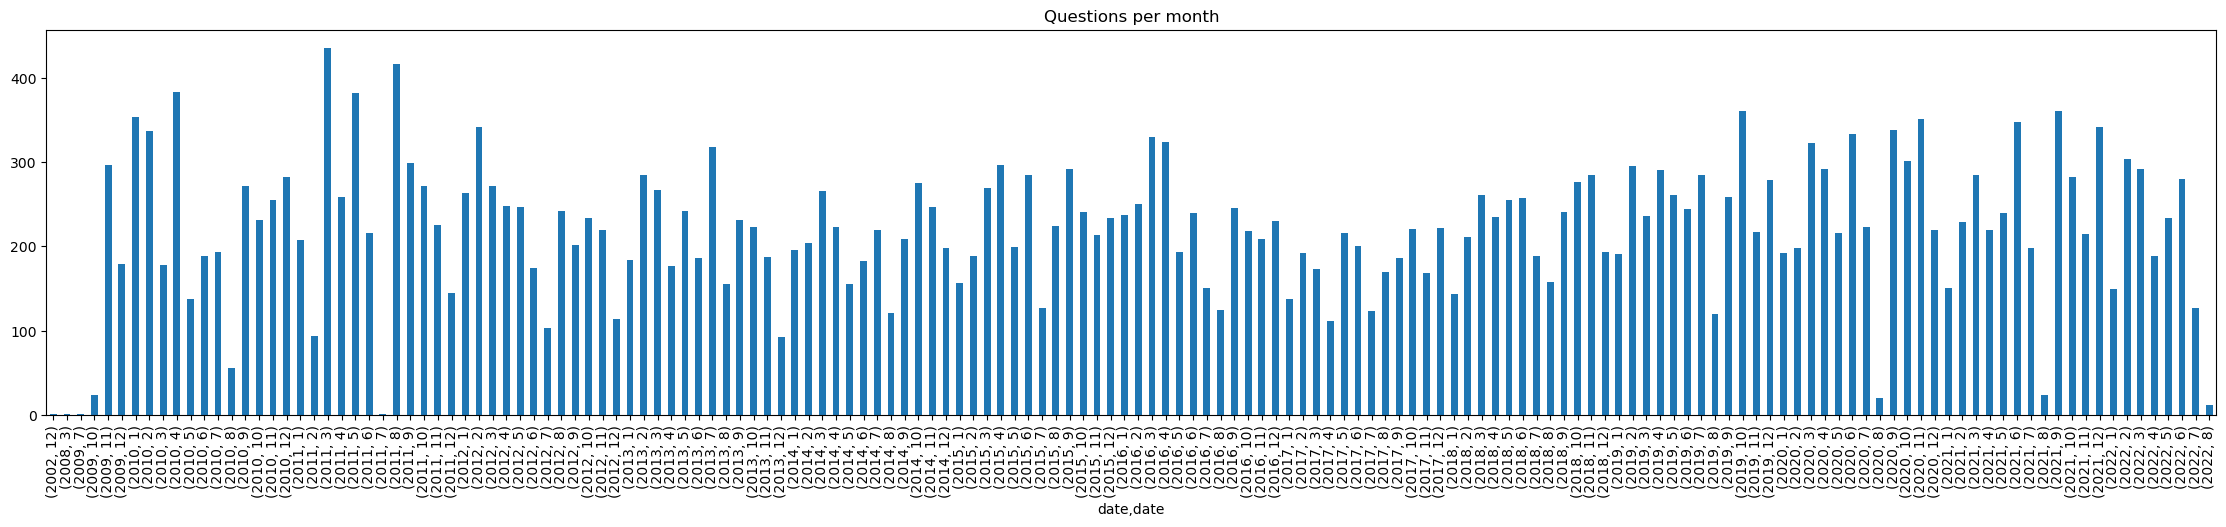

In [7]:
df['date'] = pandas.to_datetime(df['available'])
df['date'].groupby(
    [df["date"].dt.year, df["date"].dt.month]
).count().plot(kind="bar", figsize=(28,5), title='Questions per month')
# CONSIDER: nicer month names